In [1]:
# Check design matrices
# Clara Kuper, 07/27/2020

# loop throught all design matrices (all subjects)
# compute the orthogonality between conditions
# save them in a conditons x conditions x subjects matrix

# plot the distribution of orthogonalities of each condition x conditon pair
# identify subjects with non-orthogonal conditions numerically
# plot their design matrixes

#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [118]:
class Orthogonal_Matrices:
    
    def __init__(self, rand_mean = 0, rand_var = 1, time_series = 400, conditions = 5):
        # these are parameters needed to generate random matrices. They should match the dimensions of an original matrix
        self.rand_mean = rand_mean
        self.rand_var = rand_var
        self.time_series = time_series
        self.conditions = conditions
        self.rand_mat = np.random.normal(rand_mean, rand_var, (time_series, conditions)) 
        
        # these are parameters updated while collecting information
        self.n_subjects = 0
        self.matrices = np.array([])
        self.orthogonality_matrices = np.array([])
    
    def match_default_to_mat(self):
        
        """
        Sets the parameters of the random matrices to match the structure of the first design matrix
        """
        
        try:
            self.time_series = self.matrices[0].shape[0]
            self.conditions = self.matrices[0].shape[1]
        except IndexError:
            print('There is no matrix stored in this class yet. Please add one by using self.add_matrix. You can also generate a random matrix with default dimensions with self.make_matrix.')
            
    def add_matrix(self, matrix):
        
        """
        append one additional matrix to the matrices array
        """
        if self.matrices.shape[0] == 0:
                self.matrices = matrix
        else:
            self.matrices = np.dstack((self.matrices, matrix))
        self.n_subjects += 1
    
    def make_matrix(self):
        
        """
        create a (new) random matrix
        """
        
        self.rand_mat = np.random.normal(self.rand_mean, self.rand_var, (self.time_series, self.conditions))
        
    
    def check_orthogonality(self, matrix = np.array([])):
    
        """
        takes the last design matrix from design_matrices and computes the correlation between conditions.
        also accepts a matrix as an argument, but throws a warning when that happens.

        the new matrix is appended to orthogonality_matrices
        """

        # initialize the output matrix
        if matrix.shape[0] == 0:
            if len(self.matrices.shape) > 2:
                matrix = self.matrices[:,:,-1]
            else: 
                matrix = self.matrices
        
        design_dim = matrix.shape
        orth_mat = np.zeros((design_dim[1], design_dim[1]))

        # two vectors are orthogonal, if their dot product is zero
        # loop through all conditions
        for condition in range(0,design_dim[1]):
            cond_1 = matrix[:,condition]
            # compare to all conditions
            for compare in range(0, design_dim[1]):
                cond_2 = matrix[:,compare]

                orth_mat[condition,compare] = cond_1@cond_2  
        
        if self.orthogonality_matrices.shape[0] == 0:
            self.orthogonality_matrices = orth_mat
        else:
            self.orthogonality_matrices = np.dstack((self.orthogonality_matrices,orth_mat))
            
    
    def evaluate_single_subject(self, threshold):
        
        """
        checks the entries of the last orthogonality matrix and prints a warning if they cross the threshold.
        """
        # throw a warning for conditions that are not orthogonal
        
        no_warn = True
        
        if len(self.orthogonality_matrices.shape) > 2:
            orth_mat = self.orthogonality_matrices[:,:,-1]
        else:
            orth_mat = self.orthogonality_matrices
        
        warnings = np.where(orth_mat>threshold)
        for pos in range(0,len(warnings[0])):
            check_pos = np.zeros(len(warnings))

            for dim in range(0,len(warnings)):
                check_pos[dim] = warnings[dim][pos]

            if not (check_pos[0] == check_pos[1]):
                print('Watch out, for subject {}, the matrix is not orthogonal for conditons {}'.format(self.n_subjects, check_pos)) 
                no_warn = False
        if no_warn:
            print('The matrix is orthogonal for subject {}'.format(self.n_subjects))
      # if len(warnings) == 0:
      #      print('The matrix is orthogonal for subject {}'.format(self.n_subjects))
        
    def plot_orthogonalities(self):
        
        """
        generate a histogram of each orthogonality 
        """
        
        # general parameters for plotting
        conds = len(self.orthogonality_matrices[:,0,0])
        
        n_plots = (conds*conds) - ((conds*conds)/2-conds)
        n_cols = 5 
        n_rows = int(n_plots/n_cols)
        
        fig_size = (15, 2 * n_rows)
        fig_margins = 2.5
        
        fig, ax = plt.subplots(n_rows, n_cols , figsize = fig_size)
        fig.tight_layout()
        plt_id = 0
        
        array_1 = np.arange(0,conds)
        array_2 = np.arange(0,conds)
        
        for con1 in array_1:
            for con2 in array_2:
                ax[plt_id // n_cols, plt_id % n_cols].hist(self.orthogonality_matrices[con1,con2,:])
                ax[plt_id // n_cols, plt_id % n_cols].set_title('conditions: {}, {}'.format(con1, con2))
                #ax[plt_id // n_cols, plt_id % n_cols].margins(fig_margins)
                
                # reduce the dimension of array 2, so we don't plot stuff double
                plt_id +=1
            array_2 = array_2[1:]
        

How to use this class:

before you start the loop, initialize an instance of this class

% orthogonality_tests = Orthogonal_Matrices

set a threshold at which you want to reject orthogonality

in each subject loop, you will create a design matrix (DM).
add that design matrix to the class instance by calling

% orthogonality_tests.add_matrix(DM)

compute the orthogonality matrix by calling

% orthogonality_tests.check_orthogonality()

run a quick check on the subject (if you want) by calling

% orthogonality_tests.evaluate_single_subject(threshold)

this will thow a warning or tell you that everything is fine with this subject


after you finished the loop, plot all condition x condition orthogonalities by calling

% orthogonality_tests.plot_orthogonalities()

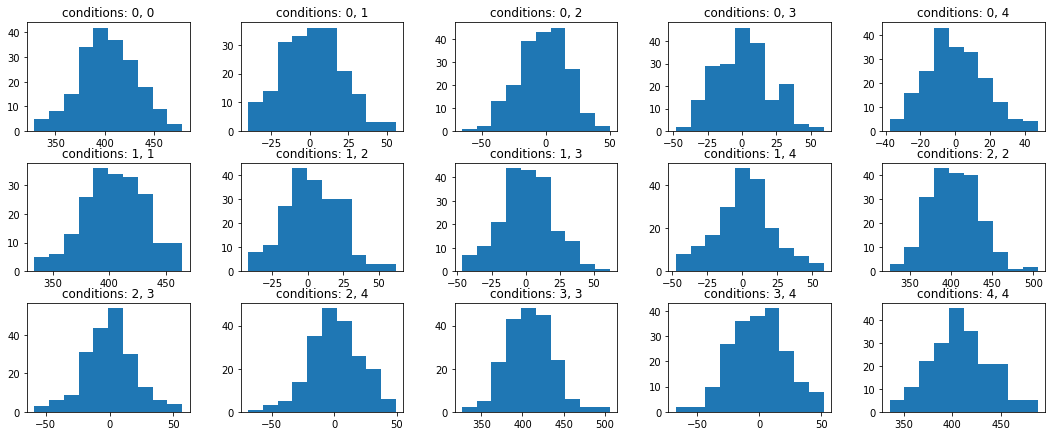

In [119]:
# Example code: Here, we will generate a random design matrix in every loop:

# define some parameters

ts_mat = 405
conds = 5
mean_mat = 0
sig_mat = 1

subjects = np.arange(0,200)

# initialize the class before the loop
# i add parameters here for the random matrix, they won't be needed when working with "real" matrices
orthogonality_tests = Orthogonal_Matrices(rand_mean = mean_mat, rand_var = sig_mat, time_series = ts_mat, conditions = conds)
orthogonal_threshold = 40

# start the loop

for sub in subjects:
    
    # generate a random design matrix (not needed with real data)
    orthogonality_tests.make_matrix()
    DM = orthogonality_tests.rand_mat
    
    ##### FROM HERE ON, THE SCRIPT CAN BE USED FOR "REAL" DESIGN MATRICES
    # save the matrix in the class
    orthogonality_tests.add_matrix(DM)
    
    # compute orthogonality
    orthogonality_tests.check_orthogonality()
    
    # check individual
    # orthogonality_tests.evaluate_single_subject(orthogonal_threshold)
    
# plot histograms outside of loop
orthogonality_tests.plot_orthogonalities()

5